<a href="https://colab.research.google.com/github/hyeonukim/DataProcessing_ImageHandling/blob/main/How_to_handle_Data%2C_and_Images(15)_Number_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving digit.png to digit.png


## Setting up

In [2]:
import cv2
import numpy as np

# the image includes handwritten numbers from 0-9. Consisting of 500 each
img = cv2.imread('digit.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# split the image 50 columns and 100 rows and put them into split
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

# reshape the (20x20) image into (1 x 400)
train = x[:, :].reshape(-1, 400).astype(np.float32)
print(train.shape)

# put each image from 0-9 into an array in correct index
k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]
print(train_labels.shape)

np.savez('trained.npz', train=train, train_labels=train_labels)

(50, 100, 20, 20)
(5000, 400)
(5000, 1)


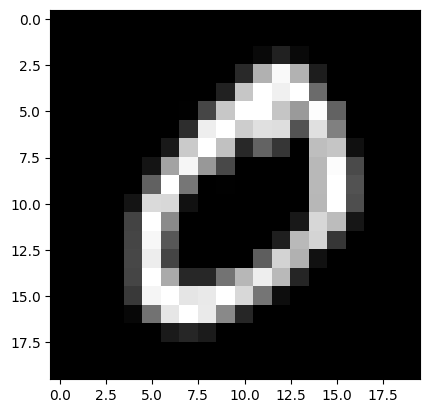

True

In [14]:
import matplotlib.pyplot as plt

# show the first index from 0
plt.imshow(cv2.cvtColor(x[0, 0], cv2.COLOR_GRAY2RGB))
plt.show()

# you can save each image seperately
cv2.imwrite('test_0.png', x[0,0])
cv2.imwrite('test_1.png', x[5,0])
cv2.imwrite('test_2.png', x[10,0])
cv2.imwrite('test_3.png', x[15,0])
cv2.imwrite('test_4.png', x[20,0])
cv2.imwrite('test_5.png', x[25,0])
cv2.imwrite('test_6.png', x[30,0])
cv2.imwrite('test_7.png', x[35,0])
cv2.imwrite('test_8.png', x[40,0])
cv2.imwrite('test_9.png', x[45,0])

## KNN number recognition

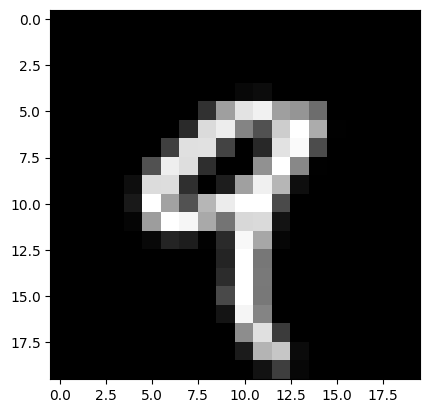

[[9.]]


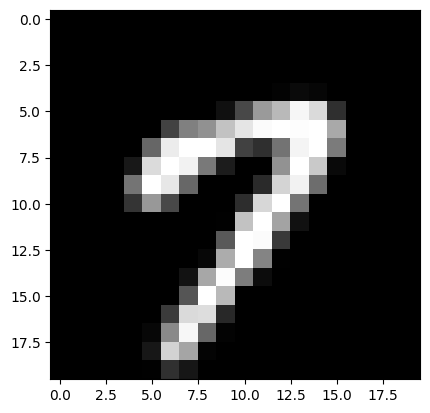

[[7.]]


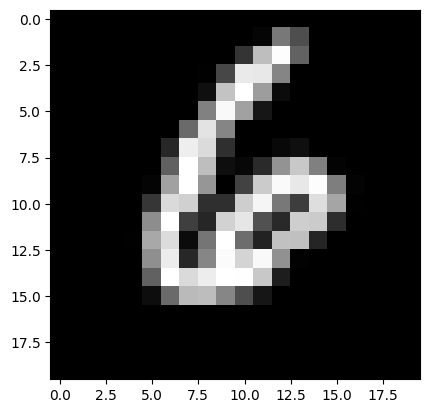

[[6.]]


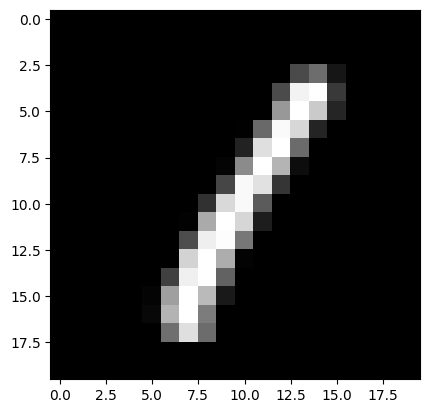

[[1.]]


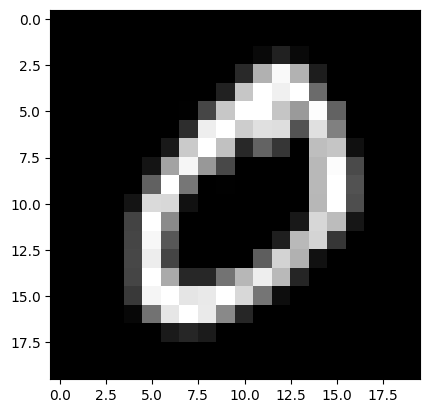

[[0.]]


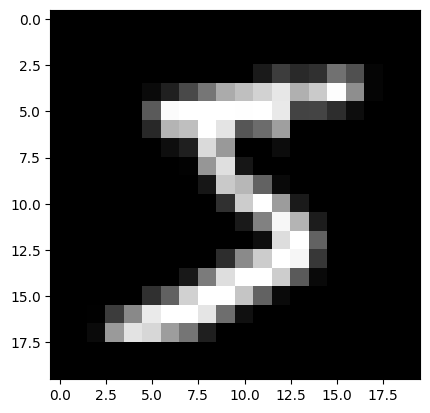

[[5.]]


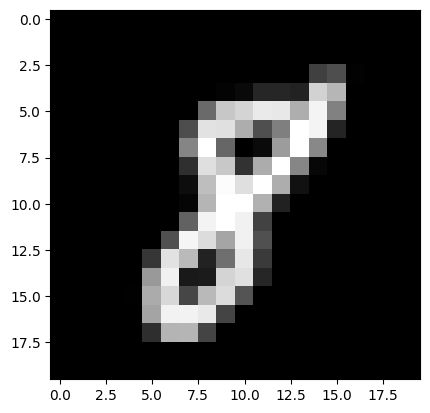

[[8.]]


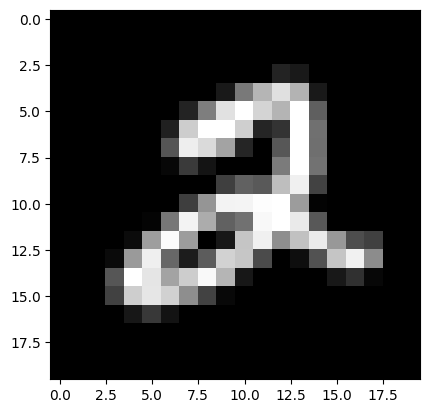

[[2.]]


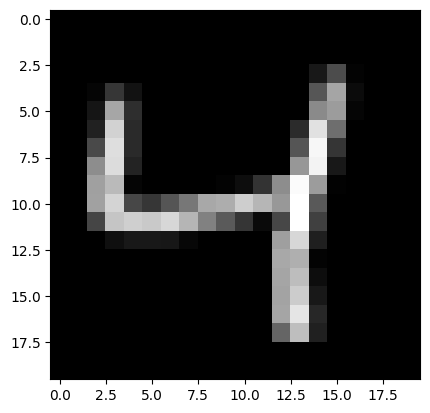

[[4.]]


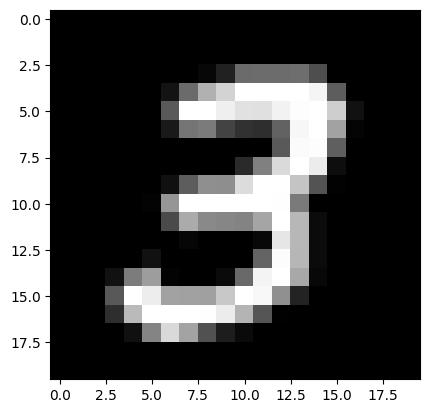

[[3.]]


In [16]:
import cv2
import numpy as np
import glob

FILE_NAME = 'trained.npz'

# loading the training data and its labels
def load_train_data(file_name):
  with np.load(file_name) as data:
    train = data['train']
    train_labels = data['train_labels']
  return train, train_labels

# scaling the handwritten image to (20 x 20)
def resize20(image):
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_resize = cv2.resize(gray, (20,20))
  plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
  plt.show()
  # returns the (1 x 400) size of image
  return gray_resize.reshape(-1, 400).astype(np.float32)

def check(test, train, train_labels):
  knn = cv2.ml.KNearest_create()
  knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
  # find the nearest 5 numbers and label itself
  ret, result, neightbours, dist = knn.findNearest(test, k=5)
  return result

train, train_labels = load_train_data(FILE_NAME)

for file_name in glob.glob('./test_*.png'):
  # put the image down first
  test = resize20(file_name)
  result = check(test, train, train_labels)
  # print the result
  print(result)